# OCR 실습
이미지 내의 글자 인식 및 추출

In [1]:
import requests
from PIL import Image
from io import BytesIO #이미지를 다루기 위해 필요함

import matplotlib.pyplot as plt

In [2]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [3]:
vision_base_url='https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [4]:
ocr_url=vision_base_url+'ocr'

## 분석할 이미지를 셋팅함. 

In [7]:
image_url='http://blog.eztok.co.kr/wp-content/uploads/sites/9/2015/05/002.png'

In [8]:
img = Image.open(BytesIO(requests.get(image_url).content))

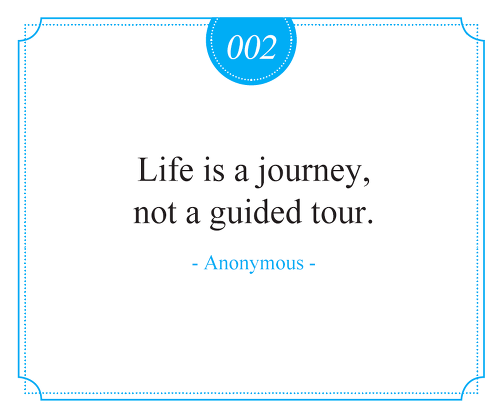

In [9]:
img

In [12]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}
data    = {'url': image_url}

In [18]:
 #'unk=unknown 언어를 모르겠을때사용 'detectOrientation': true' 문자의 방향에 맞춰 읽어내겠다 false의 경우 기울어진 글자라면 인식되지 않음

In [19]:
response=requests.post(ocr_url,headers=headers,params=params,json=data)

In [20]:
analysis=response.json()

In [21]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '133,35,240,239',
   'lines': [{'boundingBox': '227,35,50,24',
     'words': [{'boundingBox': '227,35,50,24', 'text': '002'}]},
    {'boundingBox': '138,156,231,33',
     'words': [{'boundingBox': '138,156,55,26', 'text': 'Life'},
      {'boundingBox': '204,156,20,26', 'text': 'is'},
      {'boundingBox': '235,164,14,18', 'text': 'a'},
      {'boundingBox': '255,156,114,33', 'text': 'journey,'}]},
    {'boundingBox': '133,198,240,33',
     'words': [{'boundingBox': '133,202,44,22', 'text': 'not'},
      {'boundingBox': '186,207,15,17', 'text': 'a'},
      {'boundingBox': '210,198,92,33', 'text': 'guided'},
      {'boundingBox': '311,202,62,22', 'text': 'tour.'}]},
    {'boundingBox': '192,255,123,19',
     'words': [{'boundingBox': '192,263,6,3', 'text': '-'},
      {'boundingBox': '204,255,99,19', 'text': 'Anonymous'},
      {'boundingBox': '310,263,5,3', 'text': '-'}]}]}]}

{'language': 'en', 언어:영어<p>
 'textAngle': 0.0, 문자각도: 0도(똑바로 서있음. 누워있는경우 90 도로 표현됨)<p>
 'orientation': 'Up', 방향: 윗쪽으로 잘 보인다<p>
 'regions': 인식된 텍스트들의 위치<p>
 [{'boundingBox': '21,16,304,451', ....<p>

In [22]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '227,35,50,24', 'text': '002'},
 {'boundingBox': '138,156,55,26', 'text': 'Life'},
 {'boundingBox': '204,156,20,26', 'text': 'is'},
 {'boundingBox': '235,164,14,18', 'text': 'a'},
 {'boundingBox': '255,156,114,33', 'text': 'journey,'},
 {'boundingBox': '133,202,44,22', 'text': 'not'},
 {'boundingBox': '186,207,15,17', 'text': 'a'},
 {'boundingBox': '210,198,92,33', 'text': 'guided'},
 {'boundingBox': '311,202,62,22', 'text': 'tour.'},
 {'boundingBox': '192,263,6,3', 'text': '-'},
 {'boundingBox': '204,255,99,19', 'text': 'Anonymous'},
 {'boundingBox': '310,263,5,3', 'text': '-'}]

설명 line_infos = [region["lines"] 
for region in analysis["regions"]]
word_infos = []
for line in line_infos: #리즌 안 라인속의 워드 를 갯수만큼 for문에 대입하여 반복출력함.
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos